In [159]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, GlobalMaxPooling1D, Conv1D, MaxPooling1D, Embedding, Dropout
from keras.models import Model
from keras import regularizers

In [160]:
df = pd.read_csv("spam.csv", encoding="ISO-8859-1")

In [161]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [162]:
df = df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
df.columns = ["labels", "data"]

In [163]:
df["b_labels"] = df["labels"].map({"ham": 0, "spam": 1})

y = df["b_labels"].values
x = df["data"]

In [164]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

In [165]:
tokenizer = Tokenizer(num_words=20000)

tokenizer.fit_on_texts(x_train)

sequences_train = tokenizer.texts_to_sequences(x_train)
sequences_test = tokenizer.texts_to_sequences(x_test)

In [166]:
V = len(tokenizer.word_index)
print(f"Fround {V} unique tokens")

Fround 7179 unique tokens


In [167]:
max_len_train = max(len(seq) for seq in sequences_train)

T = max_len_train

data_train = pad_sequences(sequences_train, maxlen=T)
data_test = pad_sequences(sequences_test, maxlen=T)

In [168]:
D = 20

i = Input(shape=(T, ))

layer = Embedding(V + 1, D)(i)
layer = Conv1D(32, 3, activation='relu')(layer)
layer = MaxPooling1D(3)(layer)


layer = Conv1D(64, 3, activation='relu')(layer)
layer = MaxPooling1D(3)(layer)

layer = Conv1D(128, 3, activation='relu')(layer)
layer = GlobalMaxPooling1D()(layer)

layer = Dropout(0.2)(layer)
layer = Dense(64, kernel_regularizer=regularizers.l1(0.01), activation='relu')(layer)

layer = Dense(1, activation='sigmoid')(layer)

model = Model(i, layer)

In [169]:
model.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

results = model.fit(data_train, y_train, epochs=20, validation_data=(data_test, y_test))

Epoch 1/20
117/117 [==============================] - 2s 9ms/step - loss: 4.0147 - accuracy: 0.8698 - val_loss: 1.2872 - val_accuracy: 0.8581
Epoch 2/20
117/117 [==============================] - 1s 8ms/step - loss: 0.4695 - accuracy: 0.8896 - val_loss: 0.2558 - val_accuracy: 0.9331
Epoch 3/20
117/117 [==============================] - 1s 7ms/step - loss: 0.1412 - accuracy: 0.9861 - val_loss: 0.1614 - val_accuracy: 0.9755
Epoch 4/20
117/117 [==============================] - 1s 8ms/step - loss: 0.0766 - accuracy: 0.9941 - val_loss: 0.1061 - val_accuracy: 0.9859
Epoch 5/20
117/117 [==============================] - 1s 7ms/step - loss: 0.0471 - accuracy: 0.9979 - val_loss: 0.0946 - val_accuracy: 0.9869
Epoch 6/20
117/117 [==============================] - 1s 8ms/step - loss: 0.0552 - accuracy: 0.9962 - val_loss: 0.1074 - val_accuracy: 0.9821
Epoch 7/20
117/117 [==============================] - 1s 8ms/step - loss: 0.0354 - accuracy: 0.9992 - val_loss: 0.0907 - val_accuracy: 0.9848
Epoch 

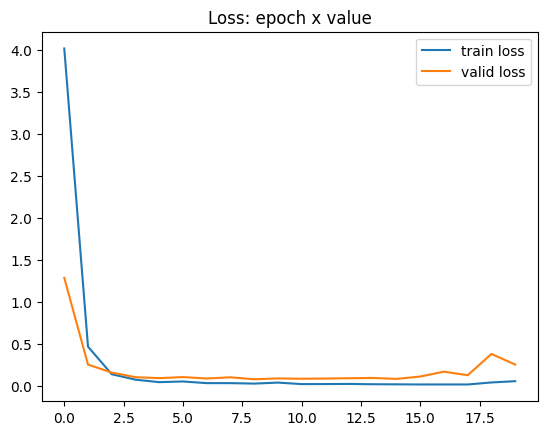

In [170]:
plt.plot(results.history["loss"], label="train loss")
plt.plot(results.history["val_loss"], label="valid loss")
plt.title("Loss: epoch x value")
plt.legend()

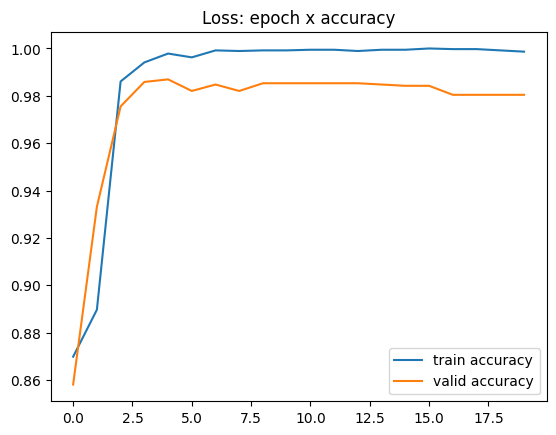

In [171]:
plt.plot(results.history["accuracy"], label="train accuracy")
plt.plot(results.history["val_accuracy"], label="valid accuracy")
plt.title("Loss: epoch x accuracy")
plt.legend()